In [1]:
print("Hello World!")

Hello World!


In [2]:
3+3 

6

In [3]:
from sklearn import datasets

digits = datasets.load_digits()
num_instances = len(digits.images)

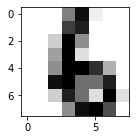

In [4]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(2, 2))
plt.imshow(digits.images[16], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [5]:
print(digits.images[16])


[[ 0.  0.  0.  8. 15.  1.  0.  0.]
 [ 0.  0.  0. 12. 14.  0.  0.  0.]
 [ 0.  0.  3. 16.  7.  0.  0.  0.]
 [ 0.  0.  6. 16.  2.  0.  0.  0.]
 [ 0.  0.  7. 16. 16. 13.  5.  0.]
 [ 0.  0. 15. 16.  9.  9. 14.  0.]
 [ 0.  0.  3. 14.  9.  2. 16.  2.]
 [ 0.  0.  0.  7. 15. 16. 11.  0.]]


In [6]:
digits_flat = digits.images.reshape((num_instances, -1))

In [7]:
split_point = 110
digits_flat_train, digits_flat_test = digits_flat[:-split_point], digits_flat[-split_point:]
digits_lbls_train, digits_lbls_test = digits.target[:-split_point], digits.target[-split_point:]

In [8]:
from sklearn import tree

In [9]:
clf_dt = tree.DecisionTreeClassifier()

In [10]:
clf_dt = clf_dt.fit(digits_flat_train, digits_lbls_train)

In [11]:
print('Accuracy:', clf_dt.score(digits_flat_test, digits_lbls_test))

Accuracy: 0.8363636363636363


In [12]:
import sklearn
predictions = clf_dt.predict(digits_flat_test)
sklearn.metrics.confusion_matrix(digits_lbls_test, predictions)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  8,  1,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  2,  3,  1,  1,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  7,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

<Figure size 432x288 with 0 Axes>

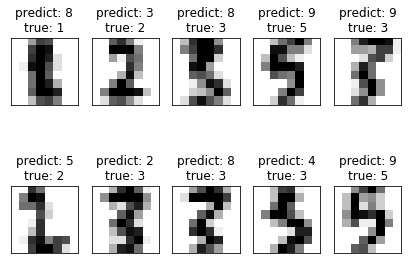

In [13]:
plt.clf()
f = plt.figure(figsize=(7, 5))
count = 0
for idx, (actual, prediction) in list(enumerate(zip(digits_lbls_test, predictions))):
    if actual == prediction:
        continue
    
    count += 1
    
    if count > 10:
        break
    
    ridx = idx + (num_instances - split_point)
    image = digits.images[ridx]
    sub = f.add_subplot(2, 5, count)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    
    sub.set_title('predict: %i\ntrue: %i' % (
        prediction, actual))

plt.show()